In [54]:
#! pip install gmsh
import numpy as np
#import gmsh
import matplotlib.pyplot as plt

In [55]:
C=-20
E=210e9
A=10
L=150
extremo_empotrado=1 #0=izq 1=der

In [56]:
func=lambda x,C,L,A,E: (np.abs(C)/(6*A*E))*(x**3-L**3)


In [57]:
elementos=3
x=np.linspace(0,L,elementos+1)

In [58]:
F=np.zeros(len(x))
f=np.zeros((2)) 
Ftot=(C/2)*(L/elementos)**2
for i in range (len(x)-1):
    f[0]= Ftot/3 + (C/2)*(x[i+1]-x[i])*x[i]
    f[1]= Ftot *(2/3)+ (C/2)*(x[i+1]-x[i])*x[i]
    F[i]+=f[0]
    F[i+1]=f[1]

In [59]:
k=np.array([[1,-1],[-1,1]])
K=np.zeros([len(x),len(x)])
#print(K)
for i in range(len(x)-1):
    (K[i:(i+2),i:(i+2)])+=(k [0:2,0:2])
    i+=1

K=np.dot((A*E/(L/elementos)),K)
Kred=K[0:(len(x)-1),0:(len(x)-1)]


In [60]:
F_=F[0:len(x)-1]

In [61]:
#print(F_)

In [62]:
d=np.linalg.solve(Kred,F_)
#print(d)
R=-F[-1]-d[-1]*(A*E/(L/elementos))
#print(R)
F[-1]=R+F[-1]
print(F)
if extremo_empotrado ==1:
    d=np.insert(d,len(d),0)
else:
     d=np.insert(d,0,0)
print(d)
#El array F representa las fuerzas de cada elemento; el array d, los desplazamientos

[  -8333.3333  -50000.     -100000.      158333.3333]
[-5.3571e-06 -5.1587e-06 -3.7698e-06  0.0000e+00]


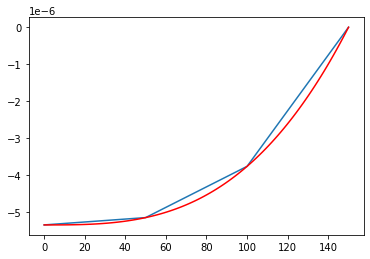

In [63]:
plt.plot(x,d)
plt.plot(np.linspace(0, Largo, 100), func(np.linspace(0, Largo, 100),C,Largo,A,E),'r')
plt.show()
